# Bagging


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataframe = pd.read_csv("C:/Users/vivek/Downloads/heart_2020_cleaned.csv")

In [4]:
dataframe

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
dataframe["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [6]:
label_encode = LabelEncoder()

In [7]:
labels = label_encode.fit_transform(dataframe.HeartDisease)

In [8]:
dataframe['target'] = labels

In [9]:
dataframe

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,target
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,1
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,0


In [10]:
df= dataframe.drop(['HeartDisease'], axis=1)

In [11]:
df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,target
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,1
319791,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0
319792,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,0
319793,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,0


In [12]:
# Yes = 3
# No = 2

df['Smoking'].replace({'Yes':3,'No':2},inplace=True)
df['AlcoholDrinking'].replace({'Yes':3,'No':2},inplace=True)
df['Stroke'].replace({'Yes':3,'No':2},inplace=True)
df['DiffWalking'].replace({'Yes':3,'No':2},inplace=True)
df['Sex'].replace({'Male':3,'Female':2},inplace=True)
df['Diabetic'].replace({'Yes':3,'No':2,'No, borderline diabetes':4,'Yes (during pregnancy)':5},inplace=True)
df['PhysicalActivity'].replace({'Yes':3,'No':2},inplace=True)
df['Asthma'].replace({'Yes':3,'No':2},inplace=True)
df['KidneyDisease'].replace({'Yes':3,'No':2},inplace=True)
df['SkinCancer'].replace({'Yes':3,'No':2},inplace=True)
df['AgeCategory'].replace({'18-24':2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7,'50-54':8,'55-59':9,'60-64':10,'65-69':11,'70-74':12,'75-79':13,'80 or older':14},inplace=True)
df['Race'].replace({'White':2,'Black':3,'Asian':4,'American Indian/Alaskan Native':5,'Other':6,'Hispanic':7},inplace=True)
df['GenHealth'].replace({'Very good':2,'Fair':3,'Good':4,'Poor':5,'Excellent':6},inplace=True)

In [13]:
df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,target
0,16.60,3,2,2,3.0,30.0,2,2,9,2,3,3,2,5.0,3,2,3,0
1,20.34,2,2,3,0.0,0.0,2,2,14,2,2,3,2,7.0,2,2,2,0
2,26.58,3,2,2,20.0,30.0,2,3,11,2,3,3,3,8.0,3,2,2,0
3,24.21,2,2,2,0.0,0.0,2,2,13,2,2,2,4,6.0,2,2,3,0
4,23.71,2,2,2,28.0,0.0,3,2,6,2,2,3,2,8.0,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,3,2,2,7.0,0.0,3,3,10,7,3,2,3,6.0,3,2,2,1
319791,29.84,3,2,2,0.0,0.0,2,3,5,7,2,3,2,5.0,3,2,2,0
319792,24.24,2,2,2,0.0,0.0,2,2,7,7,2,3,4,6.0,2,2,2,0
319793,32.81,2,2,2,0.0,0.0,2,2,3,7,2,2,4,12.0,2,2,2,0


In [14]:
#scaler = preprocessing.StandardScaler().fit(df)
#scaler

In [15]:
#df1= scaler.transform(df)
#df1

In [16]:
df1= df.sample(df.shape[0])
df1

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,target
141233,19.14,3,2,2,0.0,0.0,2,2,11,2,4,2,4,12.0,2,2,2,0
250176,27.44,3,2,3,0.0,0.0,2,2,14,2,2,3,2,6.0,2,2,2,1
298292,28.13,3,3,2,0.0,0.0,2,2,3,6,2,3,3,8.0,2,2,2,0
116384,39.86,2,2,2,0.0,5.0,2,2,12,3,4,3,4,5.0,2,2,2,0
146649,32.89,3,2,2,0.0,30.0,2,2,4,2,2,3,2,8.0,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199142,27.26,3,3,2,0.0,20.0,2,3,7,7,2,2,6,4.0,2,2,2,0
229464,31.46,3,2,2,5.0,20.0,2,3,4,2,2,3,2,8.0,2,2,2,0
200490,25.83,3,2,2,0.0,4.0,2,3,9,2,2,3,4,5.0,2,2,2,0
50062,22.69,2,2,2,0.0,0.0,2,2,4,7,2,3,6,9.0,2,2,2,0


In [17]:
df_train = df1.iloc[:223856,:].sample(100)
df_test = df1.iloc[223857:,:].sample(100)


In [18]:
df_tt = df_test.sample(50, replace = True)
X_test = df_tt.iloc[:,:-1].values
y_test = df_tt.iloc[:,-1].values

In [19]:
def evaluate(model,X,y):
    model.fit(X,y)
    plot_tree(model)
    
    plt.show()
    #plot_decision_regions(X,y,model,legend =2)
    #plot.show()
    
    y_pred = model.predict(X_test)
    
    print("y test :",y_test)
    print("y pred :",y_pred)
    print("accuracy score :",accuracy_score(y_test,y_pred))
    
    return model


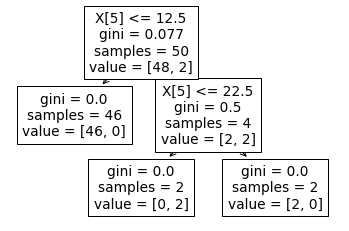

y test : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]
y pred : [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy score : 0.9


In [20]:
#first decision tree

df_t = df_train.sample(50, replace = True)
X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag1 = evaluate(dt,X_train,y_train)



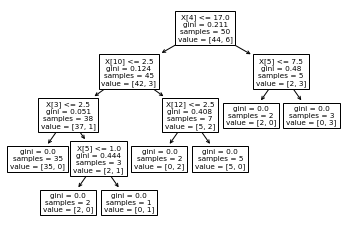

y test : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]
y pred : [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0]
accuracy score : 0.9


In [21]:
#second decision tree 

df_t = df_train.sample(50, replace = True)
X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag2 = evaluate(dt,X_train,y_train)

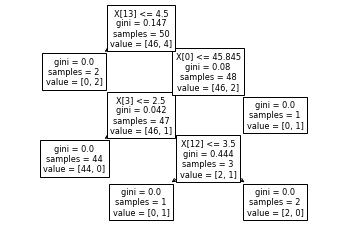

y test : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]
y pred : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy score : 0.94


In [22]:
#third decision tree 

df_t = df_train.sample(50, replace = True)
X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag3 = evaluate(dt,X_train,y_train)

## voting/stacking

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
a1 = KNeighborsClassifier()
a2 = LogisticRegression()
a3 = MultinomialNB()
a4 = GaussianNB()
a5 = DecisionTreeClassifier()
a6 = RandomForestClassifier()

In [25]:
from sklearn.ensemble import VotingClassifier

In [26]:
model1 =VotingClassifier([('K-Nearest Neighbour',a1),('Logistic Regression',a2),('Multinomial Naive Bayes',a3),('Gaussian Naive Bayes',a4),(' Decision Tree Classifier',a5),('Random Forest Classifier',a6)
                         ]
                        )

In [27]:
df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,target
0,16.60,3,2,2,3.0,30.0,2,2,9,2,3,3,2,5.0,3,2,3,0
1,20.34,2,2,3,0.0,0.0,2,2,14,2,2,3,2,7.0,2,2,2,0
2,26.58,3,2,2,20.0,30.0,2,3,11,2,3,3,3,8.0,3,2,2,0
3,24.21,2,2,2,0.0,0.0,2,2,13,2,2,2,4,6.0,2,2,3,0
4,23.71,2,2,2,28.0,0.0,3,2,6,2,2,3,2,8.0,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,3,2,2,7.0,0.0,3,3,10,7,3,2,3,6.0,3,2,2,1
319791,29.84,3,2,2,0.0,0.0,2,3,5,7,2,3,2,5.0,3,2,2,0
319792,24.24,2,2,2,0.0,0.0,2,2,7,7,2,3,4,6.0,2,2,2,0
319793,32.81,2,2,2,0.0,0.0,2,2,3,7,2,2,4,12.0,2,2,2,0


In [28]:
model1.fit(X_train,y_train)

VotingClassifier(estimators=[('K-Nearest Neighbour', KNeighborsClassifier()),
                             ('Logistic Regression', LogisticRegression()),
                             ('Multinomial Naive Bayes', MultinomialNB()),
                             ('Gaussian Naive Bayes', GaussianNB()),
                             (' Decision Tree Classifier',
                              DecisionTreeClassifier()),
                             ('Random Forest Classifier',
                              RandomForestClassifier())])

In [29]:
model1.score(X_train,y_train)

0.98

In [30]:
model1.score(X_test,y_test)

0.96

# boosting

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
abc = AdaBoostClassifier(n_estimators=4, random_state=0)
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [33]:
y_pred = abc.predict(X_test)

In [34]:
abc.score(X_test,y_test)

0.94

In [35]:
accuracy_score(y_test,y_pred)

0.94